In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

raw_data = pd.read_csv('../data/2021-SxS-Data-and-Data-Info/partial_cleaned_2021.csv')
raw_data.drop(columns='Unnamed: 0', inplace= True)
raw_data.head()


,state,division,region,gender,age_group,ethnicity,ed_lvl,marital_stat,lvng_arr,marital_stat_v2,...,10k_expense,10k_gift,expect_inheritance,num_cred_cards,health_ins,skipped_med,fin_conf_lvl,math_conf_lvl,knowledge_conf_lvl,fin_ed
0,South Carolina,South Atlantic,South,female,25-34,white,Bachelors,married,2,married,...,1,1,1,2,1,2,7,6,6,2
1,Ohio,East North Central,Midwest,female,25-34,white,Bachelors,divorced,1,single,...,2,2,2,7,1,2,1,1,2,2
2,Arizona,Mountain,West,male,65+,white,Bachelors,divorced,1,single,...,2,2,2,3,1,2,7,7,6,2
3,Arizona,Mountain,West,female,45-54,non-white,HS Grad,married,2,married,...,2,2,2,2,1,2,7,6,5,3
4,Ohio,East North Central,Midwest,female,45-54,white,GED,divorced,1,single,...,2,2,98,7,1,2,6,6,5,3


In [2]:
#Creating a couple subsets
mil_only_df = raw_data[(raw_data['mil_stat'] == 'current') | (raw_data['mil_stat'] == 'previous')]
mil_only_df.columns

Index(['state', 'division', 'region', 'gender', 'age_group', 'ethnicity',
       'ed_lvl', 'marital_stat', 'lvng_arr', 'marital_stat_v2', '#_dep_chlds',
       'hh_ann_inc', 'mil_stat', 'wrk_stat', 'ptr_wrk_stat', 'hh_ret_stat',
       'caregiver_ed_lvl', 'fin_sat_lvl', 'spend_vs_income', 'bill_difficulty',
       'income_var', 'rainyday_fund', 'child_ed_svng', 'credit_rtg',
       'mnthly_leftovers', 'checking_acct', 'saving_acct', 'ret_plan', 'ira',
       'invests', 'owns_home', '10k_expense', '10k_gift', 'expect_inheritance',
       'num_cred_cards', 'health_ins', 'skipped_med', 'fin_conf_lvl',
       'math_conf_lvl', 'knowledge_conf_lvl', 'fin_ed'],
      dtype='object')

## Demograhics

(-1.0999999853217814,
 1.0999999993010372,
 -1.0999993248722122,
 1.099999957293099)

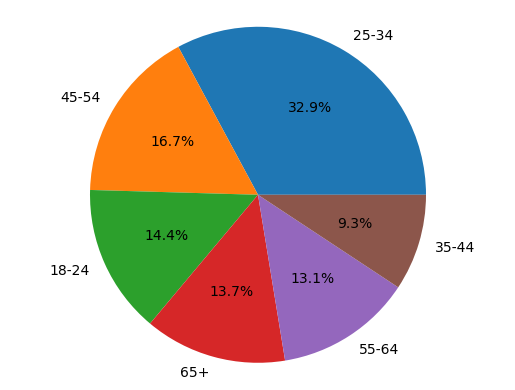

In [3]:
#Age Break Down
age_labels = mil_only_df['age_group'].unique()
mil_age_counts = mil_only_df['age_group'].value_counts()
total_age_count =raw_data['age_group'].value_counts()

plt.pie(mil_age_counts, labels=age_labels,
            autopct='%1.1f%%' )
plt.axis('equal')


In [4]:
total_age_count

age_group
65+      5501
55-64    4731
25-34    4696
45-54    4617
35-44    4564
18-24    3009
Name: count, dtype: int64

Text(0, 0.5, 'Total Count')

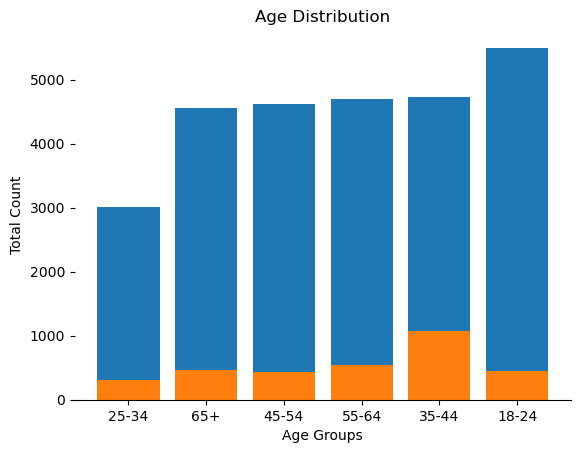

In [5]:
fig, ax = plt.subplots()
#Total Population Age Distro
bars1 = plt.bar(raw_data['age_group'].unique(), raw_data['age_group'].value_counts().sort_values() )
#military only (current or previous)
ax.bar(mil_only_df['age_group'].unique(), mil_only_df['age_group'].value_counts().sort_values())

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")


#Labels
ax.set_title('Age Distribution')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Total Count')


In [17]:
#Financial Confidence Level
fin_conf_level = raw_data[['state','fin_conf_lvl']].groupby('state').mean()

#Financial Sat
sat_lvl_df = raw_data[['state', 'fin_sat_lvl']].groupby('state').count().reset_index()
sat_lvl_df 



,state,fin_sat_lvl
0,Alabama,500
1,Alaska,500
2,Arizona,500
3,Arkansas,500
4,California,1252
5,Colorado,503
6,Connecticut,500
7,Delaware,519
8,District of Columbia,511
9,Florida,501


## Hexbin Map
code used largely from https://python-graph-gallery.com/hexbin-map-from-geojson-python/

In [13]:
# Import geopandas library
import geopandas as gpd

# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

/opt/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


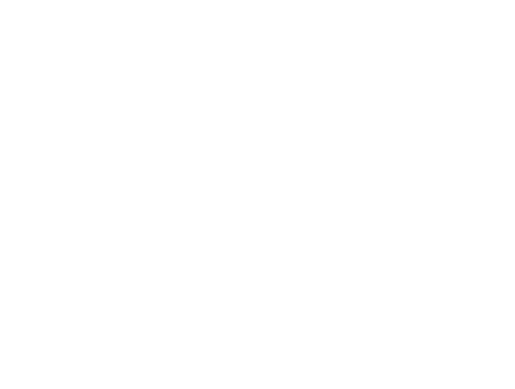

In [19]:
# Set the plot size for this notebook:
#fig, ax = plt.subplots(1, figsize=(13, 13))

# redraw the empty hexbin map:
geoData.plot(ax=ax, column =sat_lvl_df['fin_sat_lvl'],
                cmap='BuPu' ,
                edgecolor='black', 
                linewidth=.5
                )

plt.axis('off')

# add a "centroid" column with the centroid position of each county
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# for each state, annotate with the state name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    plt.annotate(text=row['iso3166_2'], xy=row['centroid'].coords[0], horizontalalignment='center', va='center')

# Add a new column to the geo dataframe that will be used for joining:
geoData['state'] = geoData['google_name'].str.replace('(United States)','')
# Merge the mariage dataset with the geospatial information
geoData = geoData.set_index('state').join(raw_data.set_index('state'))

In [ ]:
#raw_data[['state','fin_conf_lvl']].groupby('state').mean()


